# Loan Data Analysis

In this notebook we will be working with Pandas dataframes, and also using seaborn library for graphical analysis. The data set has been taken from Kaggle. We will first have to clean the data and then briefly look into any trends or correlations that the data may provide within the data. The aim from this data would be to build a model that would predict whether a loan will be accepted or rejected by the bank, depending on different factors including income, property area and many more. 

We first need to import the CSV file into a data frame and import any packages that we will use later on. The main packages that we need are 'Pandas', 'Seaborn', and 'matplotlib' but numpy may also be useful and may be required within the other libraries that we use.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as npmm
import os


#The following imports the downloaded data file.
df = pd.read_csv("loan_data_set.csv")

#Set indexing to the loan ID
df = df.set_index('Loan_ID')


Now we take a look at what the first 5 lines of the data frame look like, and also set variables for the dimensions of this data set.

In [6]:
shape = df.shape
numcol = shape[1] # number of columns
numrow = shape[0] # number of rows (data entries)

print("Number of data entries:",numrow)

Number of data entries: 614


In [7]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


We can now see that there are only 614 data entries. This is not very many, so it is something to consider when later trying to build a model. Now let's see the rate at which the loans are accepted:

In [8]:
approved_loans = df['Loan_Status'].value_counts()['Y']
total_applicants = numrow

percent_Approved = (approved_loans/total_applicants)*100

print(percent_Approved)

68.72964169381108


We see here that across the entire data set, 68.73% of the loans are approved. We can use this as a baseline, to test whether any factors have a particular influence on this result.

We now move on to do the basic statistical analysis of all the conntinuous data.

In [9]:
df.describe() #This gets summary statistics for all the quantative variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


It is important to note that the count for each of these covarients is different. This indicates that there are some missing values in the data. We will address this in the next steps when we clean the data.


# Cleaning the data

The information on Kaggle about the data suggested that the data hadn't been cleaned. i.e. there are some missing values. Our statistical summary also reinforces this. So it is firstly important to locate these and then decide how to rectify them.


In [10]:
# Identifies which columns contain missing values
df.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

We can see that the majority of columns in the data frame have at least one Nan entry. So what can we do about this? Perhaps we try removing the rows that contain this missing values.

In [11]:
copydf = df
copydf = copydf.dropna()
print(copydf.shape)
print(df.shape)


(480, 12)
(614, 12)


 If we remove rows that contain any invalid entries we lose 20% of the data, so it would be best to find an alternative option. Another option, is to not discard the whole row, but only ignore the Nan entry itself. i.e use the data entry (row) when looking at covariants that aren't the one with the invalid input.

# EDA

Now that the data has been cleaned/ we have identified potential areas where there may be issues, it is time to start presenting the data in a more visual and useful way.

## Quantitive data

First we will do a univariate analysis on the quantative data, and see if there are any correlations between each individual covariant and whether the loan is accepted.

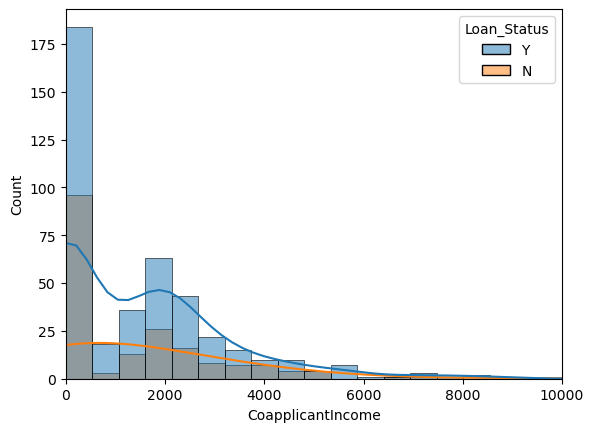

In [12]:
fig, ax = plt.subplots()
sns.histplot(data = df, x = df.CoapplicantIncome, hue = df.Loan_Status, ax=ax, kde = True)
ax.set_xlim(0,10000)
plt.show()

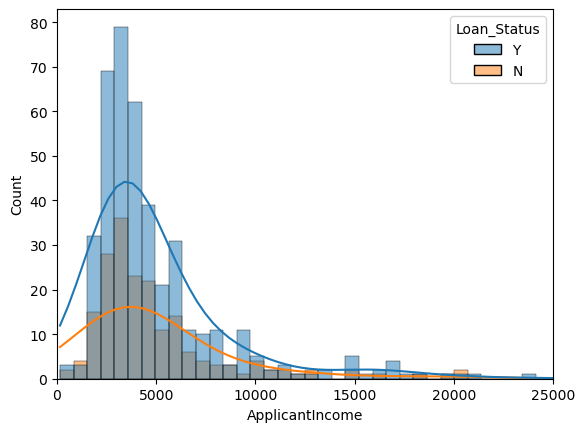

In [13]:
fig, ax = plt.subplots()
sns.histplot(data = df, x = df.ApplicantIncome, hue = df.Loan_Status, ax=ax, kde = True)
ax.set_xlim(0,25000)
plt.show()

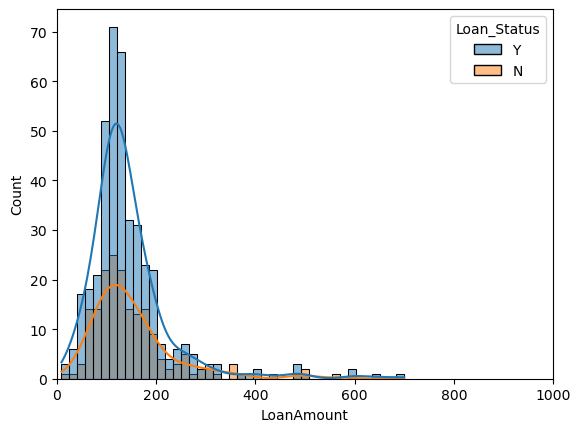

In [14]:
fig, ax = plt.subplots()
sns.histplot(data = df, x = df.LoanAmount, hue = df.Loan_Status, ax=ax, kde = True)
ax.set_xlim(0,1000)
plt.show()

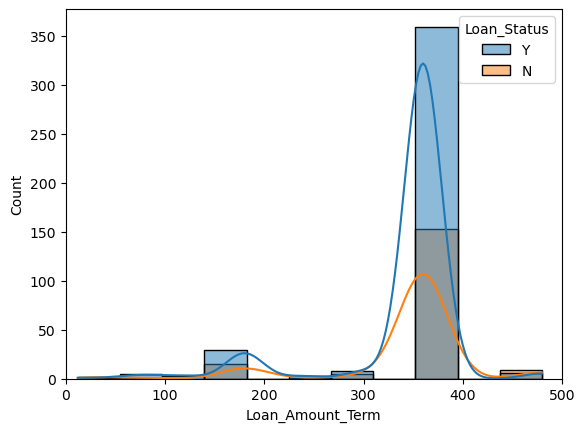

In [15]:
fig, ax = plt.subplots()
sns.histplot(data = df, x = df.Loan_Amount_Term, hue = df.Loan_Status, ax=ax, kde = True)
ax.set_xlim(0,500)
plt.show()

From the histograms above we can see that there is no obvious difference in the distribution of loans that aren't accepted compared to the ones that are. If we wanted to look at this further, we could try standardising the groups of accpeted and rejected loans so that we could compare them directly.

For now, we move on to look at a bivariate analysis for the different covariants. Let's start with looking at the loan amount vs. the applicants income. We use a scatter plot to do this:


<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

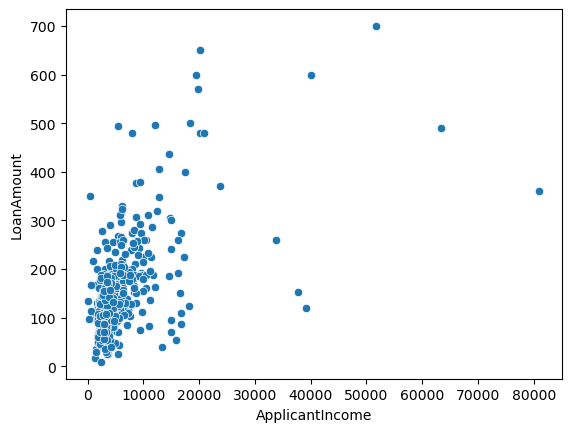

In [16]:
sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount")

We can see a slight positive correlation. Now it may be useful to see how these two factors compared to whether the loan was accepted. (loan Status y/n)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

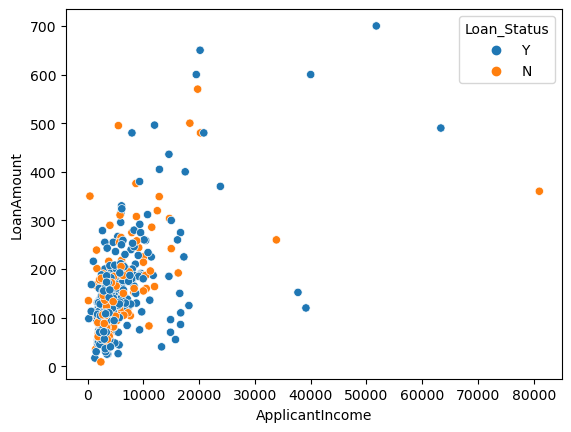

In [17]:
sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount", hue="Loan_Status")

By adding colour to identify the satus of the loan, we can see how these two covariants don't have an immediately obvious correlation with whether a loan is accepted or not. 

We can use a pairplot to do the same for all quantative covariates.

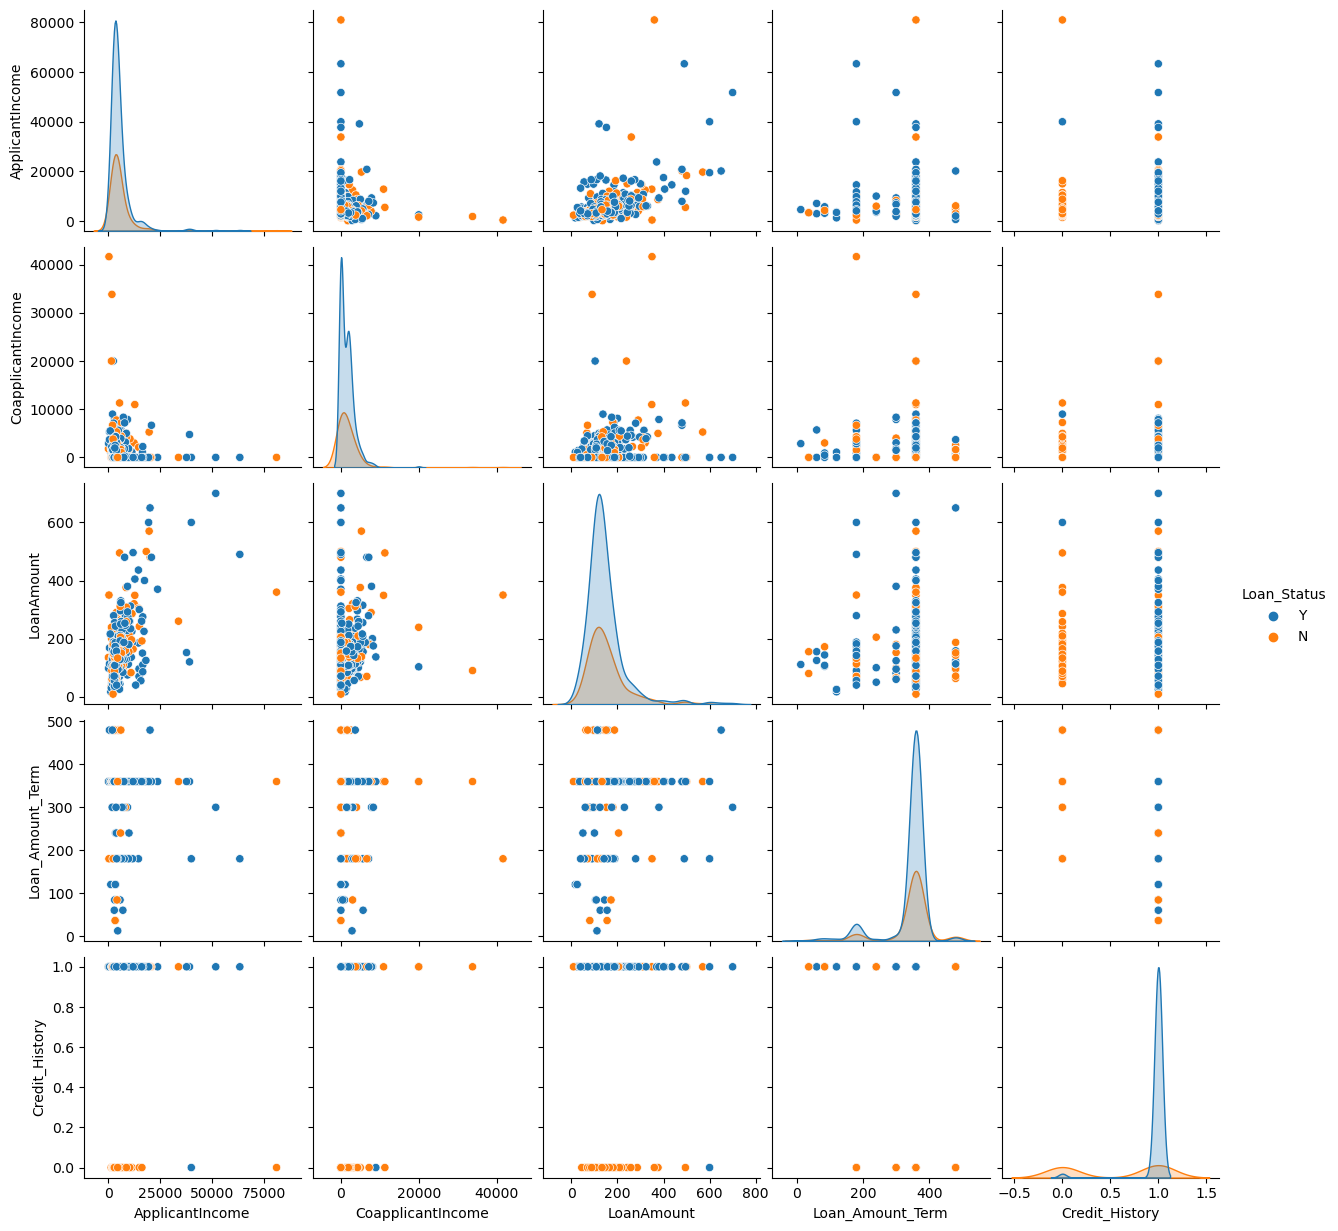

In [19]:
# Create pair plot
sns.pairplot(df, hue = 'Loan_Status')
plt.show()

We can see some trends that indicate different relationships between the covariants. A correlation marix can also be used to give exact values for their correlation, should there be any.

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


<AxesSubplot:>

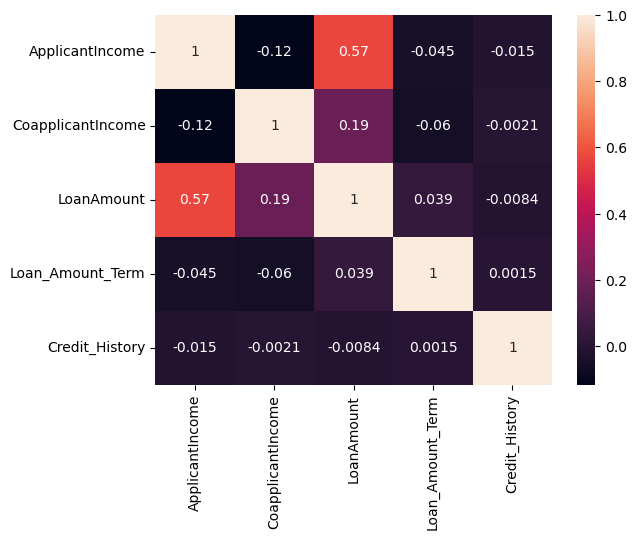

In [21]:
matrix = df.corr()
print(matrix)

sns.heatmap(matrix, annot = True)  # Uses seaborn to print a heatmap

Looking at the matrix we see that the LoanAmount covariant and ApplicantIncome covariant are the most highly correlated. With further expert knowledge, insight could be given about why this correlatio occurs. It could be something to consider when building a model, for example if one of these variables is slightly dependent on the other.

## Qualitaive Data

We now start to look at the qualitative data. To do this we use cross tables. It is then useful to visualise them using a bar graph. On the plots we have added a horizontal black line which represents the ratio of accepted to rejected loans. It is useful to be able to compare how this ratio varies between being calculated for a particular input and the overall data set. It can be an easy way to spot which inputs may lean towards a rejection.

In [22]:
pd.crosstab(index = df.Loan_Status, columns = [df.Self_Employed], colnames=['self-employed'],normalize='columns')

self-employed,No,Yes
Loan_Status,,
N,0.314,0.317073
Y,0.686,0.682927


Here the normalise variable changes the numbers into ratios. We can see which proportion or accepted and rejected loans make up each column

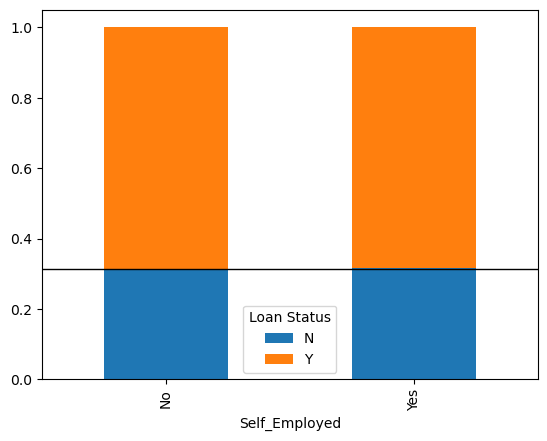

In [23]:
Plot_Self_Employed = pd.crosstab(index = df.Self_Employed, columns = [df.Loan_Status], colnames=['Loan Status'],normalize='index').plot.bar(stacked=True)
Plot_Self_Employed.axhline(y=0.3127, color= 'black', linewidth=1,)

In [24]:
pd.crosstab(index = df.Loan_Status, columns = [df.Married], colnames=['married'],normalize='columns')

married,No,Yes
Loan_Status,,
N,0.370892,0.28392
Y,0.629108,0.71608


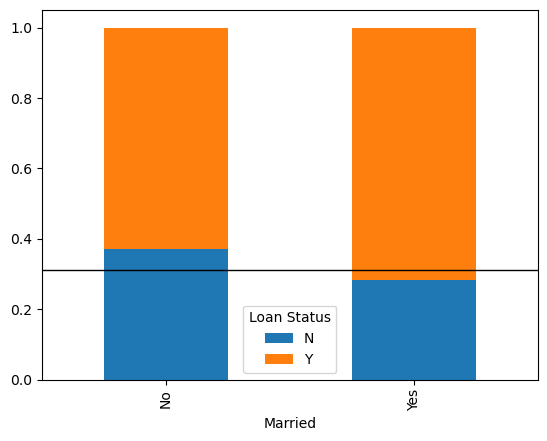

In [25]:
Plot_Married = pd.crosstab(index = df.Married, columns = [df.Loan_Status], colnames=['Loan Status'],normalize='index').plot.bar(stacked=True)
Plot_Married.axhline(y=0.3127, color= 'black', linewidth=1,)

In [26]:
pd.crosstab(index = df.Loan_Status, columns = [df.Gender], colnames=['gender'],normalize='columns')

gender,Female,Male
Loan_Status,,
N,0.330357,0.306748
Y,0.669643,0.693252


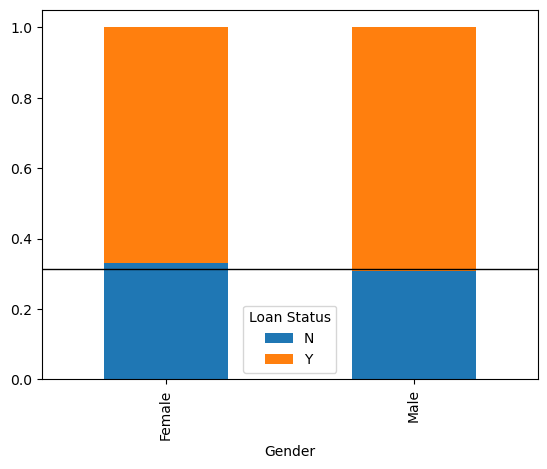

In [27]:
Plot_gender = pd.crosstab(index = df.Gender, columns = [df.Loan_Status], colnames=['Loan Status'],normalize='index').plot.bar(stacked=True)
Plot_gender.axhline(y=0.3127, color= 'black', linewidth=1,)

In [28]:
pd.crosstab(index = df.Loan_Status, columns = [df.Education], colnames=['Education'],normalize='columns')

Education,Graduate,Not Graduate
Loan_Status,,
N,0.291667,0.38806
Y,0.708333,0.61194


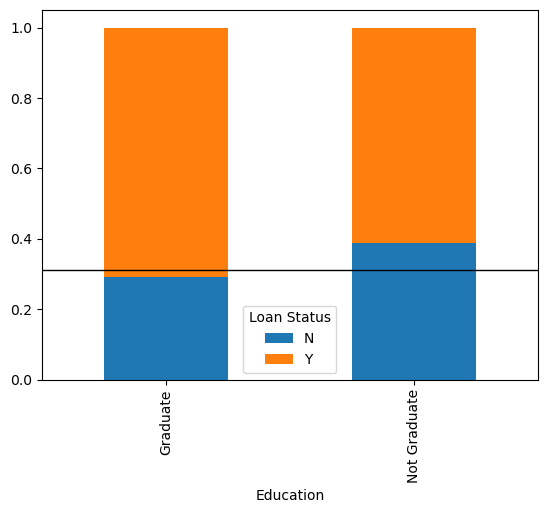

In [29]:
Plot_Area = pd.crosstab(index = df.Education, columns = [df.Loan_Status], colnames=['Loan Status'],normalize='index').plot.bar(stacked=True)
Plot_Area.axhline(y=0.3127, color= 'black', linewidth=1,)

In [30]:
pd.crosstab(index = df.Loan_Status, columns = [df.Property_Area], colnames=['Loan Status'],normalize='columns')

Loan Status,Rural,Semiurban,Urban
Loan_Status,,,
N,0.385475,0.23176,0.341584
Y,0.614525,0.76824,0.658416


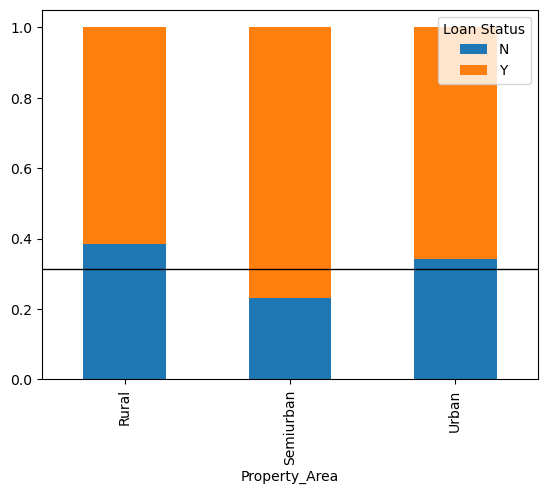

In [31]:
Plot_Area = pd.crosstab(index = df.Property_Area, columns = [df.Loan_Status], colnames=['Loan Status'],normalize='index').plot.bar(stacked=True)
Plot_Area.axhline(y=0.3127, color= 'black', linewidth=1,)

In [32]:
pd.crosstab(index = df.Loan_Status, columns = [df.Dependents], colnames=['Loan Status'],normalize='columns')

Loan Status,0,1,2,3+
Loan_Status,,,,
N,0.310145,0.352941,0.247525,0.352941
Y,0.689855,0.647059,0.752475,0.647059


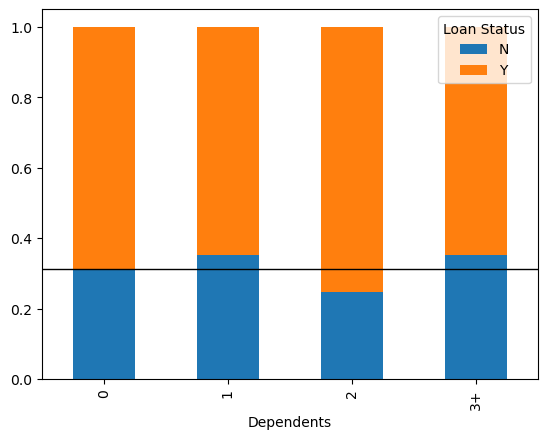

In [33]:
Plot_Dependents = pd.crosstab(index = df.Dependents, columns = [df.Loan_Status], colnames=['Loan Status'],normalize='index').plot.bar(stacked=True)
Plot_Dependents.axhline(y=0.3127, color= 'black', linewidth=1,)

## Conclusion
The initial EDA completed in this notebook has identified a few factors that could indeed be used to build a model for predicting whether a loan will be accepted or rejected. One potential way of building a model would be to use a binary classifier such a random forest or decision tree. These can be used by installing the sklearn library, which has lots of options for building different ML models. 

The issue with this data set is that there are not many entries. So by the time the data is split into a train, validation and test set, there will be very few data points in each set. This will lead to over-fitting and not produce a successful model. To overcome this issue, there are a few things that can be done. For example, bootstrapping to make more data available for use. Again, this will have its drawbacks, such as bias and increased variance. 

It would also be worth considering making a balanced data set. This includes equal numbers of rejected and accepted loans, therefore reducing the risk of an over-fitting model. 